### Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Load Data

In [13]:
import os

MODEL_PATH='/content/drive/MyDrive/UCB MIDS/W266/Final Project/Emotion Classification Model/'
os.chdir(MODEL_PATH)

!mkdir -p data
!wget -O data/goemotions_1.csv https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -O data/goemotions_2.csv https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -O data/goemotions_3.csv https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv
!wget -O data/emotions.txt https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/emotions.txt

--2023-04-14 04:17:01--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/goemotions_1.csv’

data/goemotions_1.c 100%[===================>]  13.52M  51.7MB/s    in 0.3s    

2023-04-14 04:17:02 (51.7 MB/s) - ‘data/goemotions_1.csv’ saved [14174600/14174600]

--2023-04-14 04:17:02--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141731

In [15]:
import os

DATA_PATH=MODEL_PATH + 'data'

print("Loading data...")
dfs = []
for filename in os.listdir(DATA_PATH):
    if filename.endswith(".csv"):
      dfs.append(
          pd.read_csv(os.path.join(DATA_PATH, filename), encoding="utf-8"))
data = pd.concat(dfs)
print("%d Examples" % (len(set(data["id"]))))
print("%d Annotations" % len(data))

EMOTION_FILE=MODEL_PATH + 'data/emotions.txt'

with open(EMOTION_FILE, "r") as f:
  all_emotions = f.read().splitlines()
all_emotions_neutral = all_emotions + ["neutral"]

print("%d emotion Categories" % len(all_emotions))

Loading data...
58011 Examples
211225 Annotations
28 emotion Categories


In [16]:
data = data[data[all_emotions_neutral].sum(axis=1) != 0]
ratings = data.groupby("id")[all_emotions].mean()

Plotting hierarchical relations...


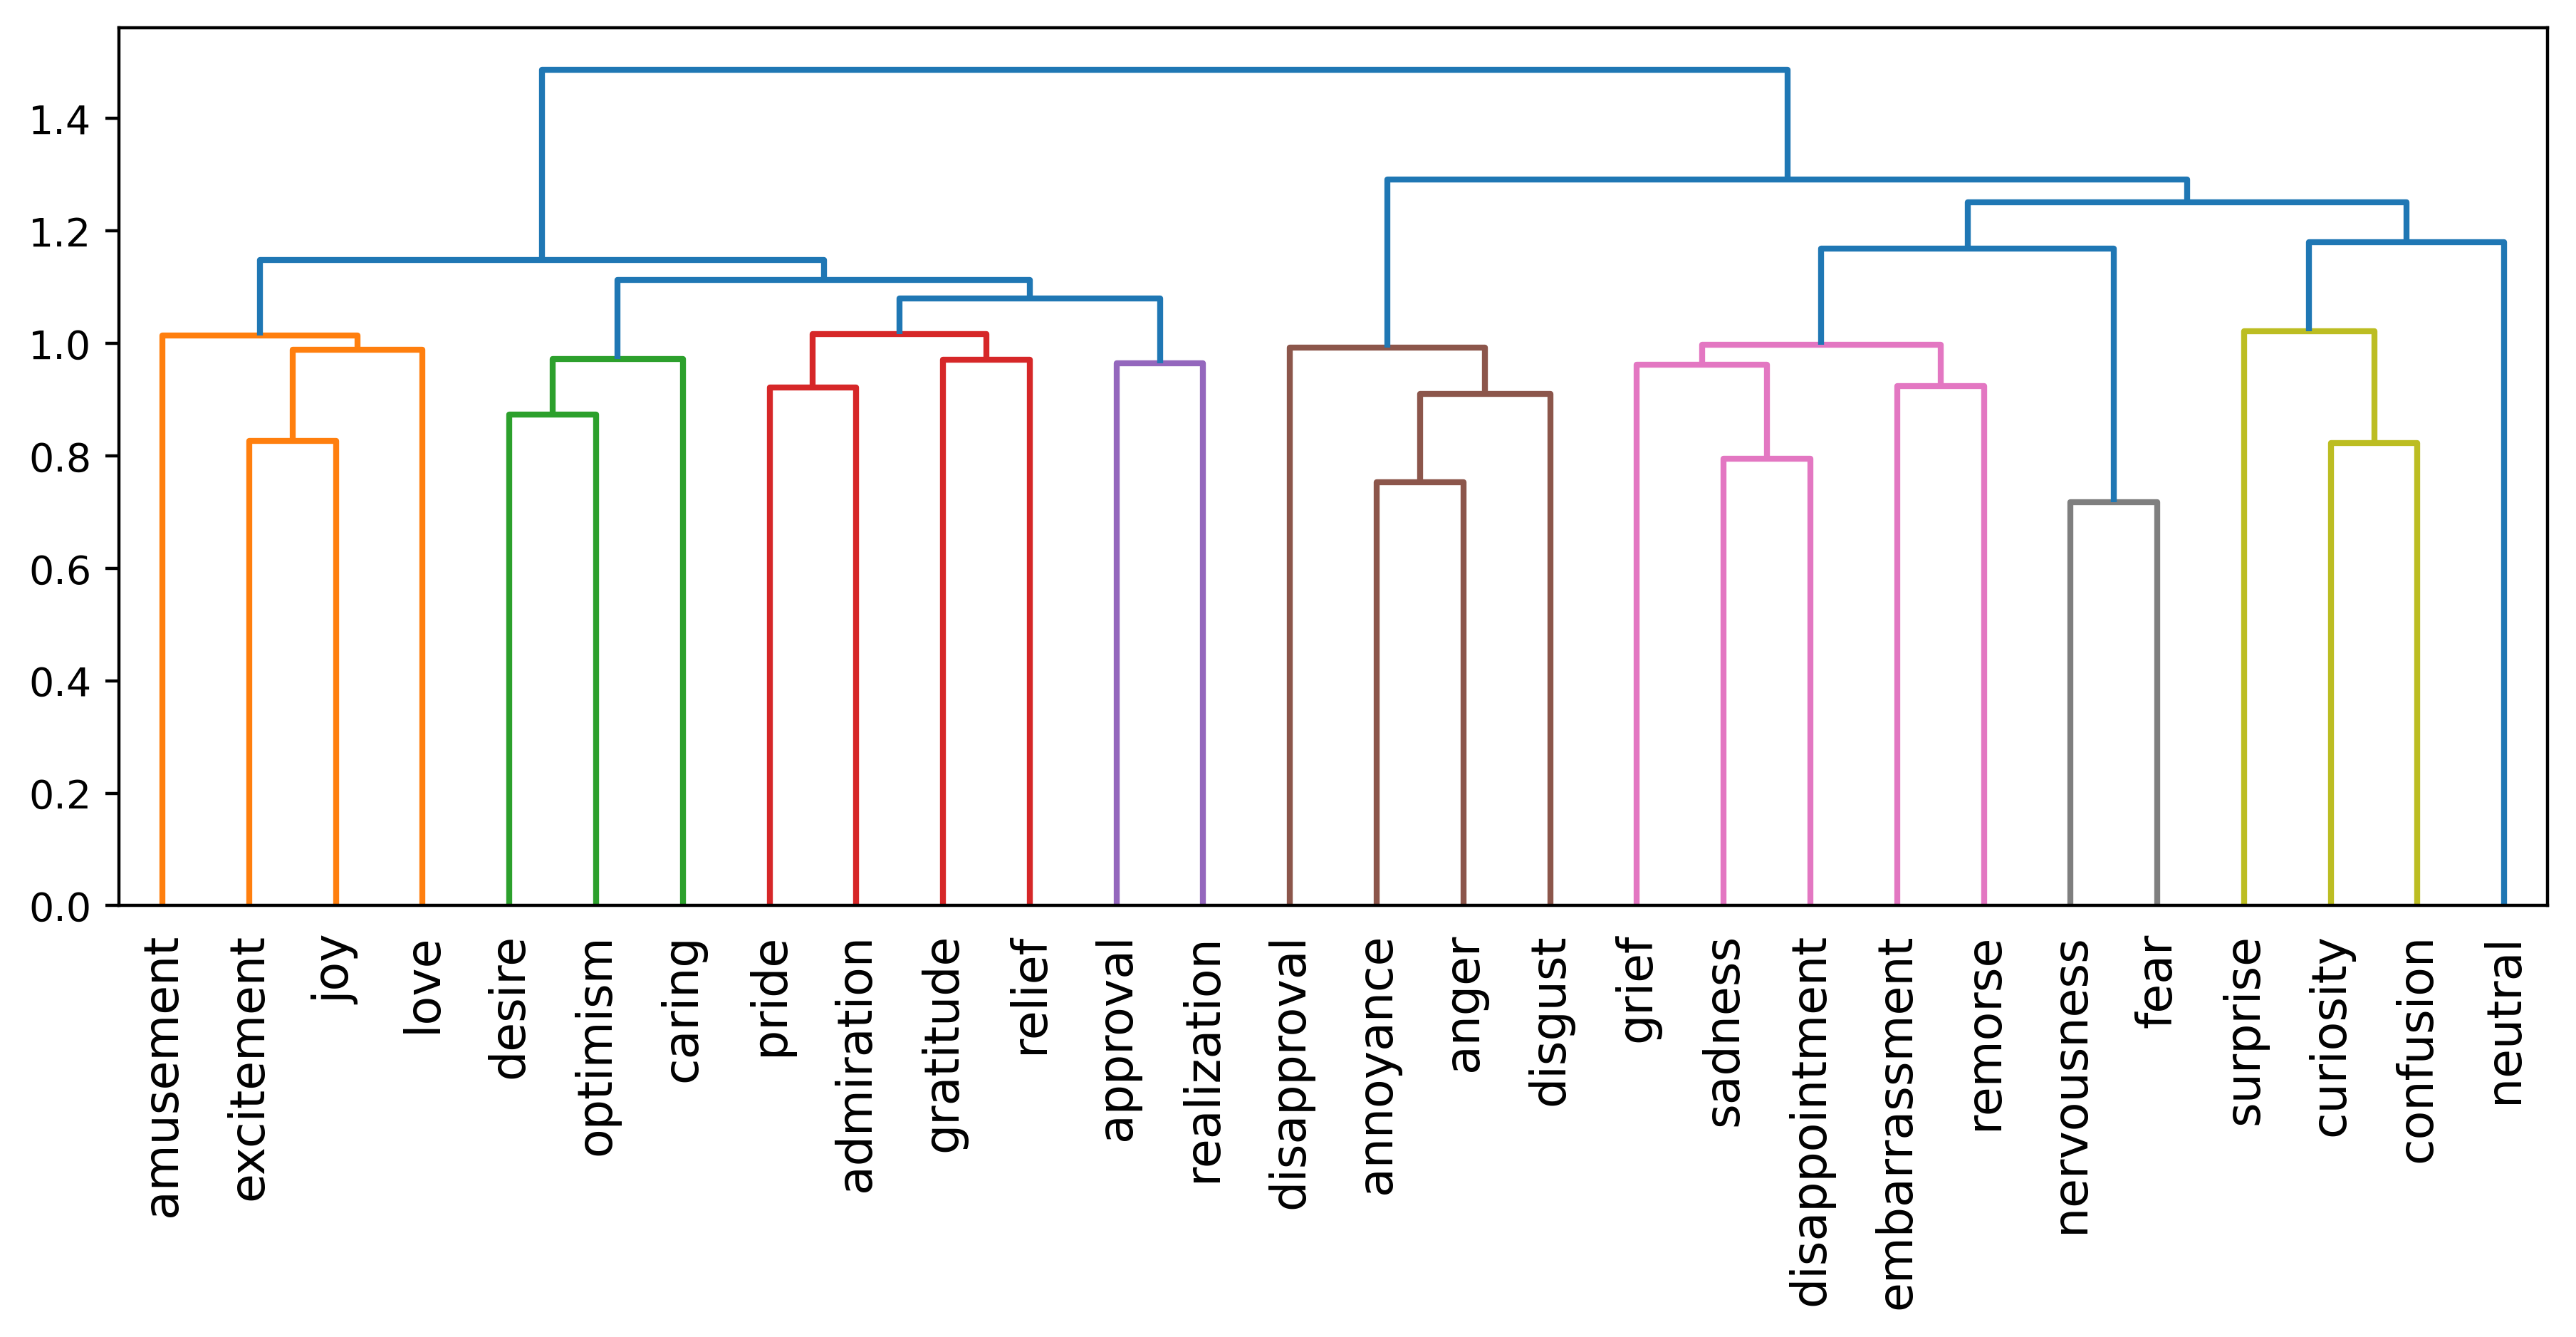

In [19]:
print("Plotting hierarchical relations...")
z = linkage(
    pdist(ratings.T, metric="correlation"),
    method="ward",
    optimal_ordering=True)
fig = plt.figure(figsize=(11, 4), dpi=400)
plt.xlabel("")
plt.ylabel("")
dn = dendrogram(
    z,
    labels=ratings.columns,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    color_threshold=1.05,
)